In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)

print("Setup completed.")

Setup completed.


In [2]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y


X, y = load_data()

In [3]:
# print("The first element of X is: ", X[0])

In [4]:
# print("The first element of y is: ", y[0, 0])
# print("The last element of y is: ", y[-1, 0])

In [5]:
# X.shape

In [6]:
# y.shape

In [7]:
# m, n = X.shape

# fig, axes = plt.subplots(8, 8, figsize=(8, 8))
# fig.tight_layout(pad=0.1)

# for i, ax in enumerate(axes.flat):
#     random_index = np.random.randint(m)
#     X_random_reshaped = X[random_index].reshape((20, 20)).T
#     ax.imshow(X_random_reshaped, cmap="gray")
#     ax.set_title(y[random_index, 0])
#     ax.set_axis_off()

In [8]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation="sigmoid"),
        Dense(15, activation="sigmoid"),
        Dense(1, activation="sigmoid"),
    ],
    name="hdr",
)

In [9]:
# model.summary()

In [10]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.005),
)

model.fit(X, y, epochs=30)

Epoch 1/30
32/32 [==============================] - 0s 725us/step - loss: 0.5271
Epoch 2/30
32/32 [==============================] - 0s 634us/step - loss: 0.1937
Epoch 3/30
32/32 [==============================] - 0s 620us/step - loss: 0.0789
Epoch 4/30
32/32 [==============================] - 0s 532us/step - loss: 0.0435
Epoch 5/30
32/32 [==============================] - 0s 566us/step - loss: 0.0296
Epoch 6/30
32/32 [==============================] - 0s 881us/step - loss: 0.0228
Epoch 7/30
32/32 [==============================] - 0s 584us/step - loss: 0.0188
Epoch 8/30
32/32 [==============================] - 0s 552us/step - loss: 0.0162
Epoch 9/30
32/32 [==============================] - 0s 548us/step - loss: 0.0144
Epoch 10/30
32/32 [==============================] - 0s 508us/step - loss: 0.0130
Epoch 11/30
32/32 [==============================] - 0s 550us/step - loss: 0.0120
Epoch 12/30
32/32 [==============================] - 0s 562us/step - loss: 0.0112
Epoch 13/30
32/32 [======

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the single example is reshaped to be two dimensional.

In [11]:
# prediction = model.predict(X[0].reshape(1, 400))  # a zero
# print(f" predicting a zero: {prediction}")
# prediction = model.predict(X[500].reshape(1, 400))  # a one
# print(f" predicting a one:  {prediction}")

The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [12]:
# if prediction >= 0.5:
#     yhat = 1
# else:
#     yhat = 0
# print(f"prediction after threshold: {yhat}")

Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

In [13]:
# import warnings

# warnings.simplefilter(action="ignore", category=FutureWarning)
# # You do not need to modify anything in this cell

# m, n = X.shape

# fig, axes = plt.subplots(8, 8, figsize=(8, 8))
# fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])  # [left, bottom, right, top]

# for i, ax in enumerate(axes.flat):
#     # Select random indices
#     random_index = np.random.randint(m)

#     # Select rows corresponding to the random indices and
#     # reshape the image
#     X_random_reshaped = X[random_index].reshape((20, 20)).T

#     # Display the image
#     ax.imshow(X_random_reshaped, cmap="gray")

#     # Predict using the Neural Network
#     prediction = model.predict(X[random_index].reshape(1, 400))
#     if prediction >= 0.5:
#         yhat = 1
#     else:
#         yhat = 0

#     # Display the label above the image
#     ax.set_title(f"{y[random_index,0]},{yhat}")
#     ax.set_axis_off()
# fig.suptitle("Label, yhat", fontsize=16)
# plt.show()

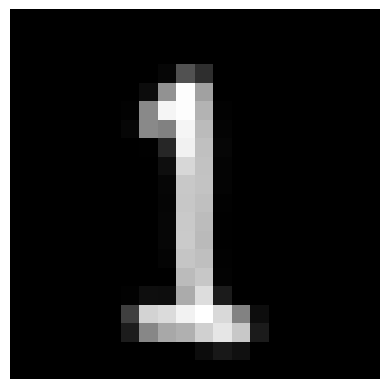

1/1 [==============================] - 0s 36ms/step
[[0.99828273]]


In [14]:
from PIL import Image

image = Image.open("test.png")
gray_image = image.convert("L")
resized_image = gray_image.resize((20, 20))
image_array = np.array(resized_image).T

plt.imshow(image_array.T, cmap="gray")
plt.axis("off")
plt.show()

prediction = model.predict(image_array.reshape(1, 400))
print(prediction)

In [15]:
# image = Image.open("test2.png")
# gray_image = image.convert("L")
# resized_image = gray_image.resize((20, 20))
# image_array = np.array(resized_image).T
# image_array = 255 - image_array

# plt.imshow(image_array.T, cmap="gray")
# plt.axis("off")
# plt.show()

# prediction = model.predict(image_array.reshape(1, 400))
# print(prediction)